# Simple Linear Regression
The goal of this notebook is to demonstrate the linear regression model made from scratch using numpy.

#### Define cost function

We formally defined the cost function using ordinary least squares, that is, the sum of the squared distances.
$$J(w) = \frac{1}{2m}\sum_{i=1}^m(h_w(x^{(i)})-y^{(i)})^2$$

And remember that the hypothesis that we're trying to find is given by the linear model:
$$h_w(x) = x \cdot w$$

#### Define Gradient Descent functions

The parameters of the model are the weights. We adjust $w_j$ to minimze the cost function $J(w)$.

And we can use batch gradient descent where each iteration performs the update
$$w_j := w_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_w(x^{(i)})-y^{(i)})x_{j}^{(i)}$$

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns (abstract data).

In [66]:
num_samples = 1000 # or 'm'
num_features = 1 # or 'n'

X = np.random.rand(num_samples, num_features) * 10
y = 2 * X + 1 + np.random.randn(num_samples, num_features) * 2

m, n = X.shape

print(f"Num features is {n}")
print(f"Num samples is {m}")

Num features is 1
Num samples is 1000


Let's plot the data.

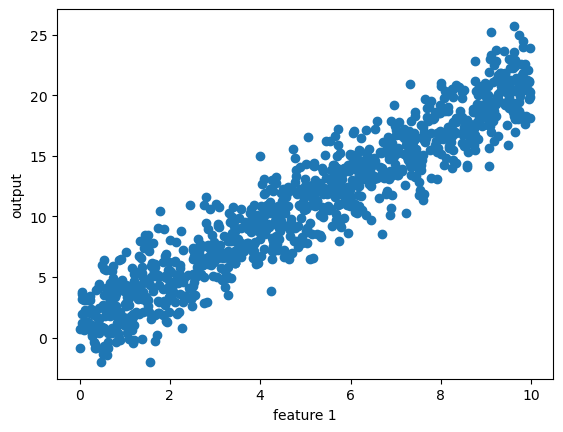

In [67]:
plt.scatter(X,y)
plt.xlabel('feature 1')
plt.ylabel('output')
plt.show()

#### Defining the hyperparamters

In [68]:
learning_rate = 0.01
num_iterations = 100

Let's import our linear regression model.

In [69]:
from linear_regression import LinearRegression

In [70]:
regressor = LinearRegression(learning_rate=learning_rate, total_iterations=num_iterations, print_cost=False)

In [71]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000, 1)


In [72]:
regressor.fit(X, y)

(1000, 2)


In [73]:
regressor.weights

array([[0.46411695],
       [2.08736007]])

In [74]:
cost_list = regressor.cost_list

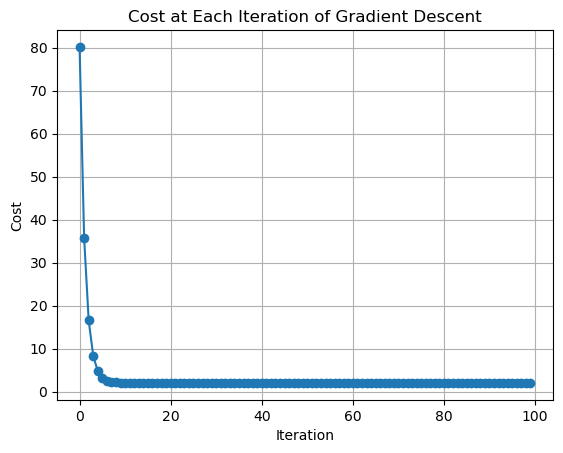

In [75]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost_list)), cost_list, marker='o')
plt.title('Cost at Each Iteration of Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

Let's check the output.

In [76]:
predictions = regressor.predict(X)

Text(0.5, 1.0, 'Linear Regression with Gradient Descent')

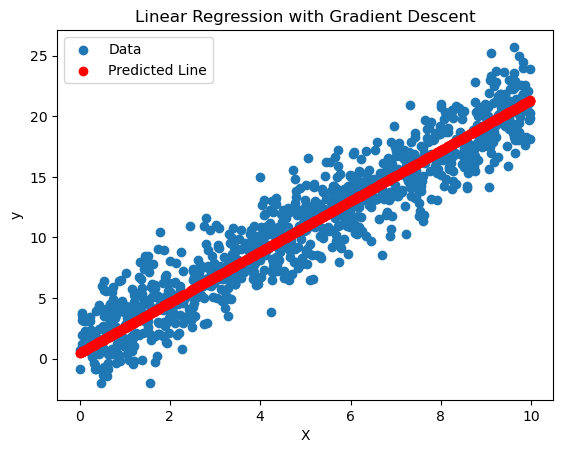

In [77]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Data')
plt.scatter(X, predictions, color='red', label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Gradient Descent')

#### Polynomial regression
Let's check now an example with polynomial regression.

In [78]:
X = np.random.rand(num_samples, 1) * 3
y = 3 * X + 5 * np.power(X, 2) + np.random.randn(num_samples, 1) * 2  # Quadratic term

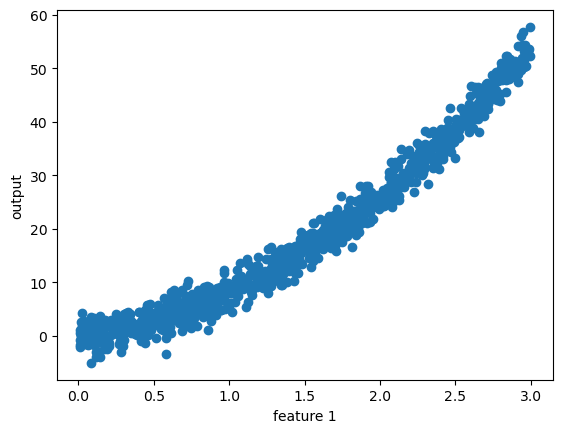

In [79]:
plt.scatter(X,y)
plt.xlabel('feature 1')
plt.ylabel('output')
plt.show()

Let's try fitting it with a linear regressor.

In [80]:
regressor.fit(X, y)
print(regressor.weights)

(1000, 2)
[[ 3.3691063 ]
 [11.99130289]]


Text(0.5, 1.0, 'Linear Regression with Gradient Descent')

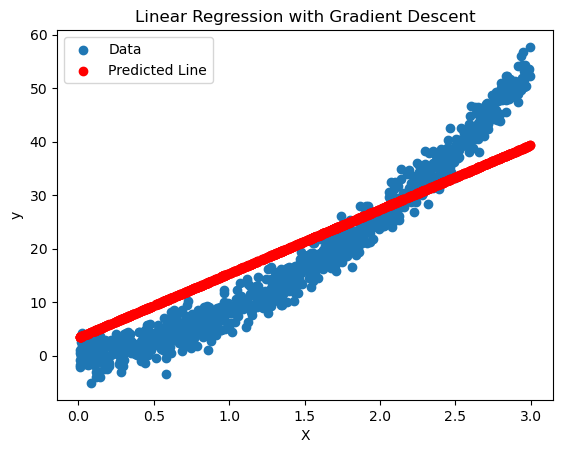

In [81]:
predictions = regressor.predict(X)
plt.scatter(X, y, label='Data')
plt.scatter(X, predictions, color='red', label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Gradient Descent')

It is obvious that this data can not be correctly fitted with a linear regressor. We are going to see how we can play with the input features to convert the linear regression problem into a polynomial regression one.

In [82]:
def add_polynomial_features(X, degree=2):
    """Add polynomial features up to the specified degree."""
    X_poly = X.copy()
    for d in range(2, degree + 1):
        X_poly = np.hstack((X_poly, np.power(X, d)))
    return X_poly

In [83]:
X_poly = add_polynomial_features(X, degree=2)
print(X_poly.shape)

(1000, 2)


(1000, 3)


Text(0.5, 1.0, 'Polynomial Regression with Gradient Descent')

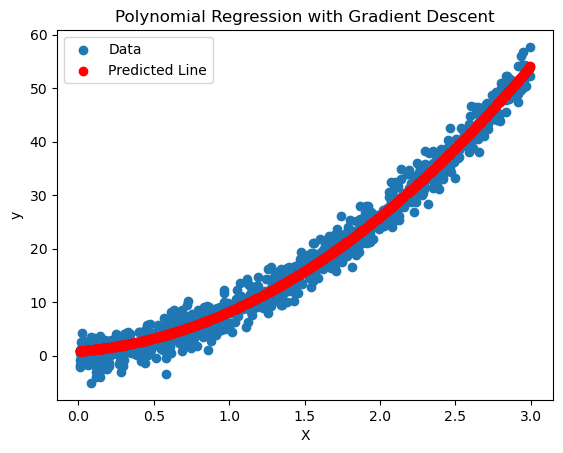

In [84]:
regressor.fit(X_poly, y)
predictions = regressor.predict(X_poly)
plt.scatter(X, y, label='Data')
plt.scatter(X, predictions, color='red', label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression with Gradient Descent')

The same could be applied to logarithmic regression or any other type.